In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import glob

In [2]:
dbs = glob.glob('*10*.db')
dbs.sort()

In [3]:
results =[]
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
for filename in dbs:
    conn = db.OpsimDatabase(filename)
    bundleList = []
    sql = ''
    metric = metrics.CountMetric(col='filter')
    slicer = slicers.HealpixSlicer()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
    bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    results.append(bg)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['filter', 'fieldRA', 'fieldDec'].
Found 2180436 visits
Running:  ['opsim_Count_filter_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['filter', 'fieldRA', 'fieldDec'].
Found 2181092 visits
Running:  ['opsim_Count_filter_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['filter', 'fieldRA', 'fieldDec'].
Found 2179424 visits
Running:  ['opsim_Count_filter_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer usin

In [4]:
labels = {0: 'Standard', 1:'No GP', 2:'double GP', 3: 'Half SCp/NES'}

In [5]:
mvs = [list(results[i].bundleDict.values())[0].metricValues for i in range(0,4)]

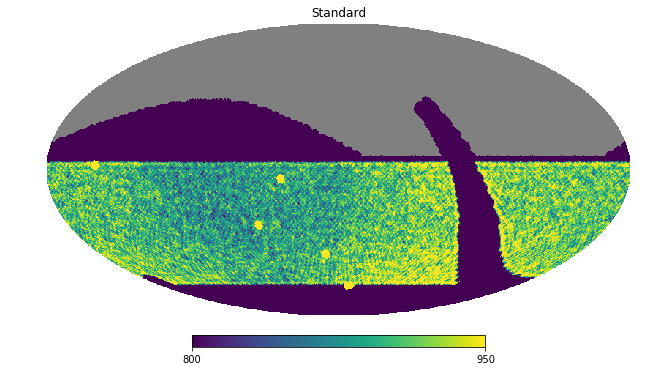

In [6]:
hp.mollview(mvs[0], max=950, min=800, title=labels[0])

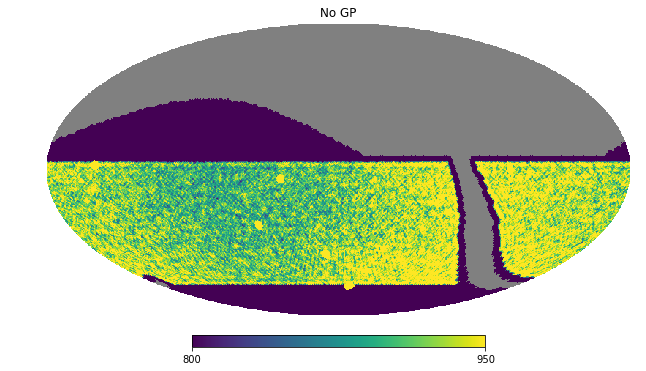

In [7]:
i=1
hp.mollview(mvs[i], max=950, min=800, title=labels[i])

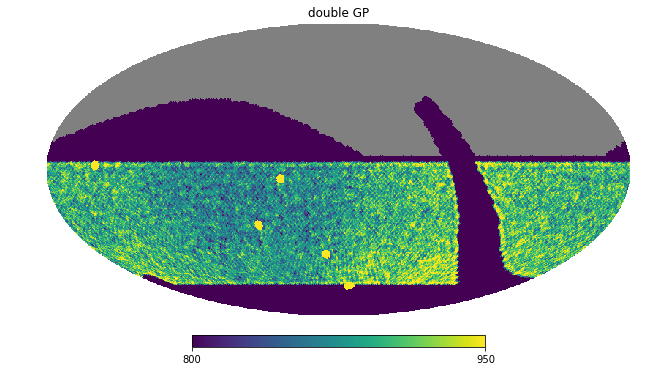

In [8]:
# The point here is that doubling the GP weight was "free" in the sense that while there are fewer WFD observations, the WFD is now more uniform
i=2
hp.mollview(mvs[i], max=950, min=800, title=labels[i])

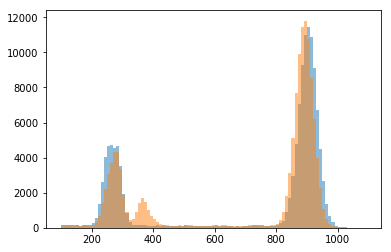

In [9]:
bins = np.arange(100,1100, 10)
ack = plt.hist(mvs[0], label='standard', bins=bins, alpha=0.5)
ack = plt.hist(mvs[2], label='double gp', bins=bins, alpha=0.5)

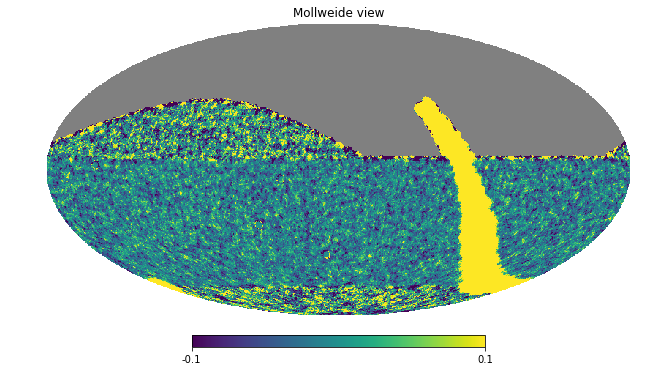

In [10]:
hp.mollview( (mvs[2]-mvs[0])/mvs[0], min=-.1, max=.1)

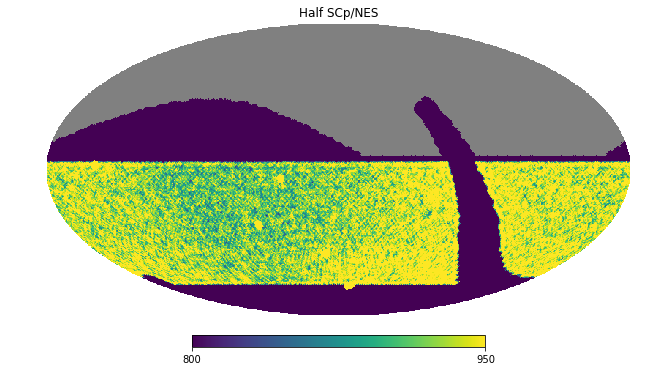

In [11]:
i=3
hp.mollview(mvs[i], max=950, min=800, title=labels[i])

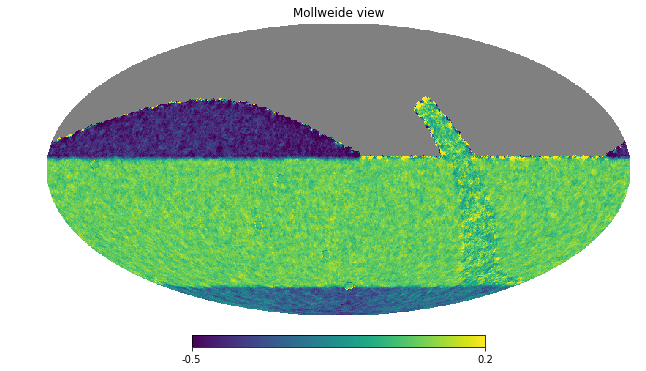

In [12]:
hp.mollview( (mvs[3]-mvs[0])/mvs[0], min=-.5, max=.2)